In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Business Problem
Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [5]:
print(f"Data Shape: {data.shape}")
print(f"Data Dimension: {data.ndim}")
print(f"Data Size: {data.size}")
print(f"Data Info: {data.info()}")

Data Shape: (8807, 12)
Data Dimension: 2
Data Size: 105684
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Data Info: None


In [6]:
# Value Counts
data.value_counts()

show_id  type   title                director             cast                                                                                                                                                                           country                                                 date_added          release_year  rating  duration  listed_in                                         description                                                                                                                                             
s10      Movie  The Starling         Theodore Melfi       Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor         United States                                           September 24, 2021  2021          PG-13   104 min   Comedies, Dramas                                  A woman adjusting to life after a loss contends with a feisty bir

In [7]:
# Unique
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
# Null or Missing data in the ollowing columns
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# Get all the value counts of all the neccessary features
# here I take only type, title, director and country only
columns = data.columns
for col in columns[[1,2,3,5]]:
    print(f"Value Counts for feature: {col}:\n{data[col].value_counts()}")
    print()

Value Counts for feature: type:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Value Counts for feature: title:
title
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: count, Length: 8807, dtype: int64

Value Counts for feature: director:
director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross

## 1. How has the number of movies released per year changed over the last 20-30 years?

In [11]:
changed = data.groupby('release_year')['title'].count().reset_index()
changed

,release_year,title
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


(1990.0, 2022.0)

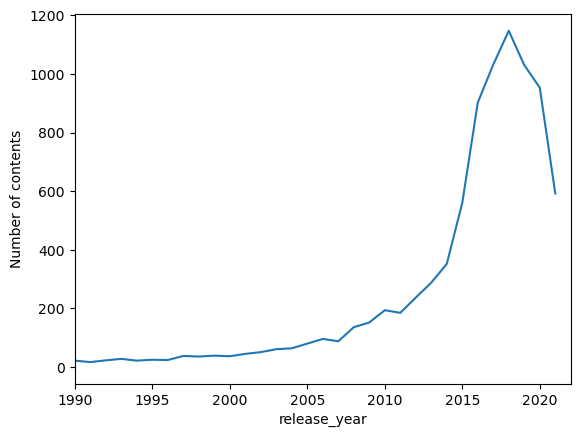

In [12]:
sns.lineplot(data=changed,y='title',x='release_year')
plt.ylabel('Number of contents')
plt.xlim(1990,2022)

#### Over the last 20-30 years there is a massive growth in releasing of movies and here we see a decline later maybe because of COVID 

## 2. Comparison of tv shows vs. movies.

In [15]:
# comparison on the basis of number of movies and tv shows
data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [16]:
# Country wise polularity in Tv shows and Movies.
country_wise_popularity = data.groupby('country').aggregate({'type':['min','max','count']}).reset_index()
country_wise_popularity.columns = ['_'.join(i) for i in country_wise_popularity.columns]
country_wise_popularity.sort_values('type_count',ascending=False)

,country_,type_min,type_max,type_count
603,United States,Movie,TV Show,2818
251,India,Movie,TV Show,972
506,United Kingdom,Movie,TV Show,419
319,Japan,Movie,TV Show,245
435,South Korea,Movie,TV Show,199
...,...,...,...,...
281,"Ireland, Canada, Luxembourg, United States, Un...",Movie,Movie,1
282,"Ireland, Canada, United Kingdom, United States",Movie,Movie,1
283,"Ireland, Canada, United States, United Kingdom",TV Show,TV Show,1
284,"Ireland, France, Iceland, United States, Mexic...",Movie,Movie,1


#### Content Duration Comparison
If I would get total hours of content for an individual movie or show I would have compaired the duration in addition to counts that would give better insights on movie and tv shows content

### By the above insight I found that on Netflix 
1. There are more number of movies than tv shows.
2. United States is the top most Netflix content producer with 2818 Movies + Tv Shows.
3. Next most content producer is India.
4. South Korea, West Germany and few other countries produce least content (Just 1)

## 3. What is the best time to launch a TV show?

In [20]:
data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [22]:
data['date_added'] = pd.to_datetime(data['date_added'], format="%B %d, %Y", errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [23]:
data['month_added'] = data['date_added'].dt.month
data.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3.0


In [24]:
tv_show_records = data.loc[data['type']=='TV Show']
tv_show_records.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0


In [25]:
tv_show_records['month_added'].value_counts()

month_added
7.0     254
12.0    250
9.0     246
6.0     232
8.0     230
10.0    210
4.0     209
3.0     205
11.0    199
5.0     187
1.0     181
2.0     175
Name: count, dtype: int64

<Axes: xlabel='month_added', ylabel='count'>

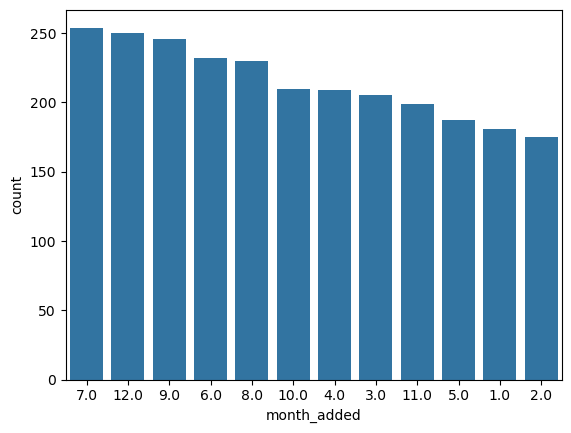

In [26]:
sns.countplot(data=tv_show_records,x='month_added',order=tv_show_records['month_added'].value_counts().index)

### February is the best time to launch a TV show because of lesser competition in compaired to other months released

## 4. Analysis of actors/directors of different types of shows/movies.

In [29]:
data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0


In [30]:
data['director'].nunique()

4528

In [31]:
data['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

Rajiv Chilaka is found to be the director who directed the most

In [33]:
# Now I am going to create a new dataset where individual cast actor would be called
data['nested_cast'] = data['cast'].apply(lambda x: str(x).split(', '))
new_data = data.explode('nested_cast')
new_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,nested_cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,nan
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,Ama Qamata
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,Khosi Ngema


In [34]:
# count the values of an individual actor appeared in differnnt movies and tv shows
new_data['nested_cast'].value_counts()

nested_cast
nan                        825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: count, Length: 36440, dtype: int64

Anupam Kher is found to be the most appeared actor in cast.

## 5. Does Netflix has more focus on TV Shows than movies in recent years

In [37]:
# Let's fetch the data after 2019
recent_years_data = data.loc[data['date_added'].dt.year>2018]
recent_years_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,nested_cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,[nan]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."


In [38]:
recent_years_data.shape

(5375, 14)

In [39]:
recent_years_data['type'].value_counts()

type
Movie      3701
TV Show    1674
Name: count, dtype: int64

In [40]:
data['date_added'].dt.year.max()

2021.0

No according to the recent data of past a few years there is a clear difference between movies and tv shows and tv shows are found to be half of movies content

## 6. Understanding what content is available in different countries

In [43]:
# Country wise polularity in Tv shows and Movies.
country_wise_popularity = data.groupby('country').aggregate({'type':['min','max','count']}).reset_index()
country_wise_popularity.columns = ['_'.join(i) for i in country_wise_popularity.columns]
country_wise_popularity.sort_values('type_count',ascending=False)

,country_,type_min,type_max,type_count
603,United States,Movie,TV Show,2818
251,India,Movie,TV Show,972
506,United Kingdom,Movie,TV Show,419
319,Japan,Movie,TV Show,245
435,South Korea,Movie,TV Show,199
...,...,...,...,...
281,"Ireland, Canada, Luxembourg, United States, Un...",Movie,Movie,1
282,"Ireland, Canada, United Kingdom, United States",Movie,Movie,1
283,"Ireland, Canada, United States, United Kingdom",TV Show,TV Show,1
284,"Ireland, France, Iceland, United States, Mexic...",Movie,Movie,1


In [44]:
np.any(country_wise_popularity['type_min'].isna()),np.any(country_wise_popularity['type_max'].isna())

(False, False)

Therefore no null values

In [46]:
def availiable_content(data):
    if data['type_min'] == data['type_max']:
        data['availiable_content'] = data['type_min']
    else:
        data['availiable_content'] = data['type_max']+", "+data['type_min']
    return data

country_netflix_data = country_wise_popularity.apply(availiable_content, axis=1).sort_values('type_count',ascending=False)
country_netflix_data.rename({'country_':'country'},inplace=True,axis=1)
country_netflix_data

,country,type_min,type_max,type_count,availiable_content
603,United States,Movie,TV Show,2818,"TV Show, Movie"
251,India,Movie,TV Show,972,"TV Show, Movie"
506,United Kingdom,Movie,TV Show,419,"TV Show, Movie"
319,Japan,Movie,TV Show,245,"TV Show, Movie"
435,South Korea,Movie,TV Show,199,"TV Show, Movie"
...,...,...,...,...,...
281,"Ireland, Canada, Luxembourg, United States, Un...",Movie,Movie,1,Movie
282,"Ireland, Canada, United Kingdom, United States",Movie,Movie,1,Movie
283,"Ireland, Canada, United States, United Kingdom",TV Show,TV Show,1,TV Show
284,"Ireland, France, Iceland, United States, Mexic...",Movie,Movie,1,Movie


In [47]:
country_netflix_data['availiable_content'].value_counts()

availiable_content
Movie             552
TV Show, Movie     99
TV Show            97
Name: count, dtype: int64

In [48]:
# Now let's get the most productive director
data['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [49]:
directors_records = data.groupby('director').aggregate({'release_year':['min','max','count']}).reset_index()
directors_records.columns = ['_'.join(i) for i in directors_records.columns]
directors_records['duration'] = directors_records['release_year_max']-directors_records['release_year_min']+1
directors_records['productivity'] = directors_records['release_year_count']/directors_records['duration']
directors_records.sort_values('productivity',ascending=False)

,director_,release_year_min,release_year_max,release_year_count,duration,productivity
3443,"Raúl Campos, Jan Suter",2016,2018,18,3,6.000000
3431,Rathindran R Prasad,2021,2021,4,1,4.000000
1146,Edward Cotterill,2017,2017,4,1,4.000000
2197,Kayode Kasum,2020,2020,4,1,4.000000
2135,Justin G. Dyck,2017,2018,7,2,3.500000
...,...,...,...,...,...,...
4396,Walter Hill,1980,2016,3,37,0.081081
2221,Ken Burns,1990,2014,2,25,0.080000
3703,Sam Raimi,1981,2007,2,27,0.074074
3979,Stephen Chiodo,1988,2020,2,33,0.060606


Raúl Campos, Jan Suter are found to be the most productive director of Netflix

In [51]:
data['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

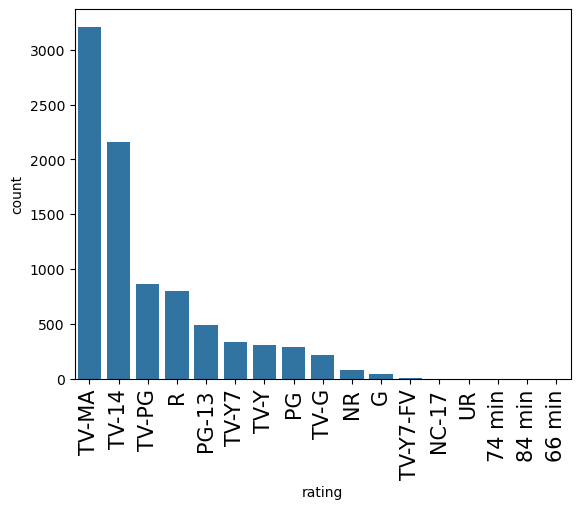

In [52]:
sns.countplot(data=data,x='rating',order=data['rating'].value_counts().index)
plt.xticks(rotation=90,size=15)
plt.show()

In [53]:
data.select_dtypes(include='object').head(2)

,show_id,type,title,director,cast,country,rating,duration,listed_in,description,nested_cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[nan]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."


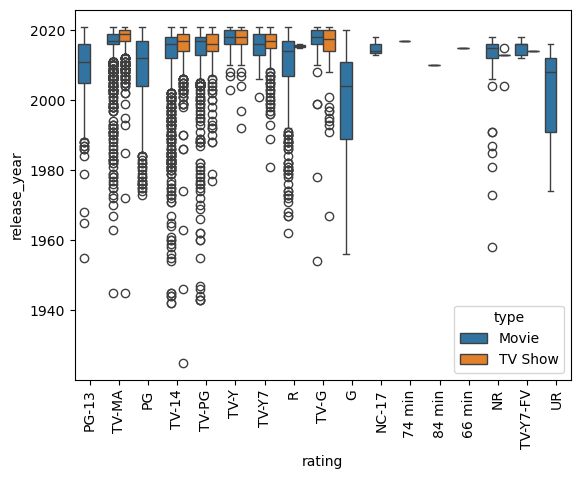

In [54]:
# Checkout the rating of movies released all time.
# NCC aproach so Box Plot would be used.
sns.boxplot(data=data,x='rating',y='release_year',hue='type')
plt.xticks(rotation=90)
plt.show()

The above graph on release_year vs rating also shows the great expansion of Netflix in the recent years. More movies have been released and more number of times they are rated. Each rating represent the count of an individual movie.

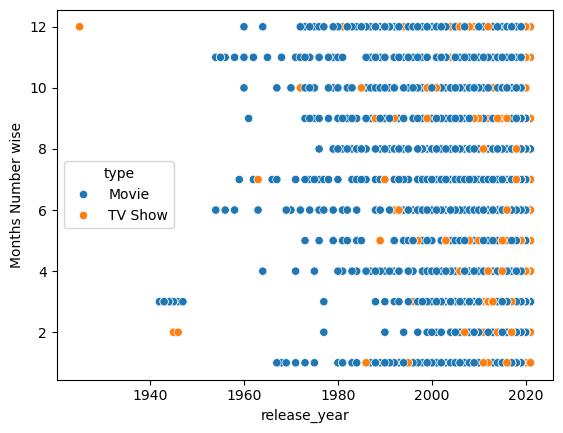

In [56]:
# Present content producing months over the years and differentiate them on type
# NNC approach so Sctter plot would be used
sns.scatterplot(data=data, x='release_year', y='month_added', hue='type')
plt.ylabel('Months Number wise')
plt.show()

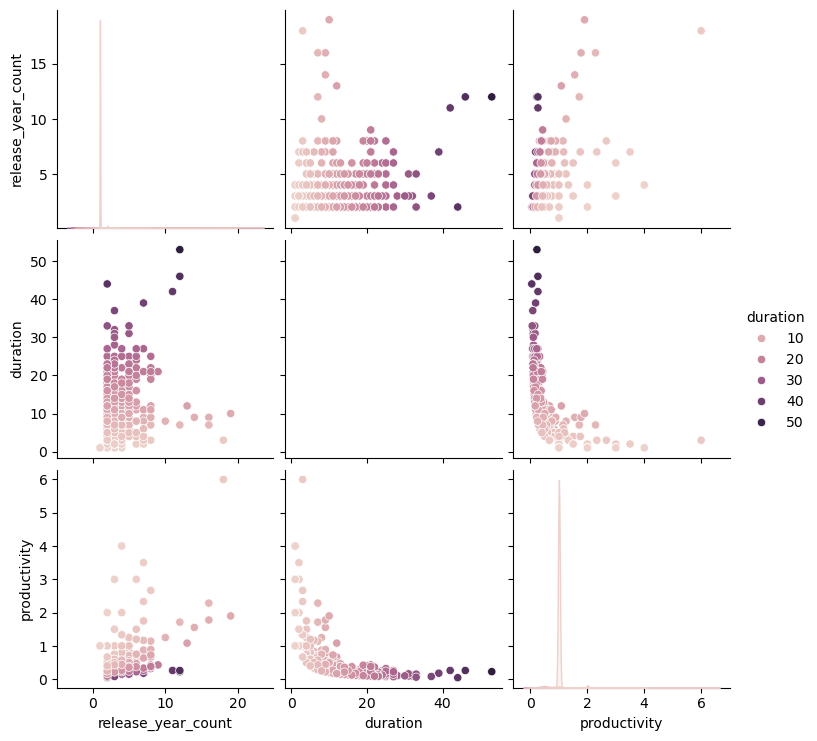

In [57]:
# Let's get the final Pair plot
sns.pairplot(data=directors_records,vars=['release_year_count','duration','productivity'],hue='duration')

1. Duration is the tim span of a director in years.
2. Directors with shorter span in directing movies are found to be more productive.

## Business Insights

1. There are more number of movies than tv shows.
2. United States is the top most Netflix content producer with 2818 Movies + Tv Shows.
3. Next most content producer is India.
4. South Korea, West Germany and few other countries produce least content (Just 1).
5. Over the last 20-30 years there is a massive growth in releasing of movies and here we see a decline later maybe because of COVID.
6. Rajiv Chilaka is found to be the director who directed the most.
7. Shahrukh Khan is the second most appeared actor in Neflix having 35 followed by Anupam Kher who has the most 43 appearances.
8. Raúl Campos, Jan Suter are found to be the most productive director of Netflix
9. TV-MA is the most occurred rank.
10. Directors with shorter span in directing movies are found to be more productive.


## Recommendations
Cut throat competition has been found among all the contents that were released at a time. To minimize the competetion I found out that February is the month when less shows are launched on Netflix so there are higher chance that Production houses would target that month and it's another opportunity for Netflix to grab the film rights at low price.